![MSE Logo](https://moodle.msengineering.ch/pluginfile.php/1/core_admin/logo/0x150/1643104191/logo-mse.png)

# AnTeDe Lab 1: Text Segmentation with NLTK

## Objectives
The goal of the first [AnTeDe](https://moodle.msengineering.ch/course/view.php?id=2222) lab is to run simple operations for text analysis using the [NLTK](http://www.nltk.org/) toolkit.  You will use the environment that you set up following the instructions of the previous notebook: [Python 3](https://www.python.org/) with [Jupyter](https://jupyter.org/) notebooks.  

You will use NLTK functions to get texts from the web and segment (split) them into sentences and words (also called *tokens*).  You will also experiment with extracting statistics about the texts.

To submit your practical work, please execute anew all cells of this notebook via "Runtime > Restart and run all", then save it, zip it, and submit it as homework on the [AnTeDe Moodle page](https://moodle.msengineering.ch/course/view.php?id=2222).

<font color='green'>Please answer the questions in green within this notebook, and submit the completed notebook under the corresponding homework on Moodle.</font>

## NLTK: the Natural Language (Processing) Toolkit

Please add NLTK to your Python installation, by following the installation instructions at the [NLTK website](http://www.nltk.org/install.html).  A good way to get started is to look at [Chapter 1](http://www.nltk.org/book/ch01.html) of the [NLTK book (NLP with Python)](http://www.nltk.org/book/) and to try some of the instructions there.  

The online edition is updated for Python 3, but the printed book, also available in PDF on some websites, is only for Python 2 ([Natural Language Processing with Python: Analyzing Text with the Natural Language Toolkit, Steven Bird, Ewan Klein, and Edward Loper, O'Reilly Media, 2009](http://shop.oreilly.com/product/9780596516499.do)). 

To use NLTK in Jupyter, all you need is to `import nltk` before you need it.  You must use the prefix `nltk.` unless you write for instance: `from nltk.book import *` which will import and define several text collections (a.k.a corpora).  NLTK can download from the associated website a large number of corpora.  NLTK has a download manager which can be called from a Python interpreter (not a notebook) using `nltk.download()`. 

In [1]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/davebrunner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<font color='green'>**Question**: To verify your NLTK library, please define a list of words called `sentence1`, print its length (`len()`) and use `nltk.bigrams` to generate all bigrams from it, i.e. pairs of consecutive words.</font>  

You can see an example in [Sec. 3.3 of Ch. 1 of the NLTK book](http://www.nltk.org/book/ch01.html#collocations-and-bigrams).  Please also sort bigrams alphabetically.

In [2]:
sentence1 = ['Shall', 'I', 'compare', 'thee', 'to', 'a', 'summer', 'day', '?']
print(len(sentence1))
bigrams1 = list(nltk.bigrams(sentence1))
sorted(set(bigrams1))

9


[('I', 'compare'),
 ('Shall', 'I'),
 ('a', 'summer'),
 ('compare', 'thee'),
 ('day', '?'),
 ('summer', 'day'),
 ('thee', 'to'),
 ('to', 'a')]

## Using NLTK to download, tokenize, and save a text

<font color='green'>**Question**: Using inspiration from [Chapter 3 (3.1. Processing Raw Text) of the NLTK book](http://www.nltk.org/book/ch03.html), get the book "Crime and Punishment" (see. file 2554) from the Gutenberg Project in text format.  

Print its length and and comment whether this refers to bytes or characters. </font>

In [3]:
from urllib import request

url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(type(raw))
print("length: ", len(raw))

#It refers to characters.

<class 'str'>
length:  1176812


If you are curious about "special" characters, you can refer to [Python's documentation of Unicode support](https://docs.python.org/3.8/howto/unicode.html).)

We now want to keep only the meaningful text from the book, without the header and the final license. 

<font color='green'>**Question**: Determine how much you should trim from the beginning and from the end in order to keep only the actual text of the book. <br>
The book starts after: "\*\*\* START OF THE PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT \*\*\*" <br>
The book ends before: "\*\*\* END OF THE PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT \*\*\*"

Print out the resulting start and end indices and save the result into a new string.</font>

In [4]:
# Please write your Python code below and execute it.
start_string = "*** START OF THE PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT ***"
stop_string = "*** END OF THE PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT ***"
start_index = raw.index(start_string) + len(start_string)
stop_index = raw.index(stop_string)
print("Start index ", start_index)
print("Stop index ", stop_index)

slided_raw = raw[start_index:stop_index]
print("Length of sliced: ", len(slided_raw))

Start index  879
Stop index  1158049
Length of sliced:  1157170


We will first segment the text into sentences, then tokenize each sentence, i.e. segment it into tokens (words and punctuations).  We can also tokenize the entire text without segmenting it into sentences first.  We will use the following NLTK functions:
* `nltk.sent_tokenize(...)` (documented [here](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.word_tokenize)) (usually, only word segmentation is called *tokenization*, but NLTK uses this name for both functions)
* `nltk.word_tokenize(...)` (documented [here](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.sent_tokenize))

<font color='green'>**Question**: Segment the text into sentences with NLTK, display the number of sentences, and display the five sentences between 500 and 504.</font>

In [5]:
# Please write your Python code in this cell and execute it.
sentences = nltk.sent_tokenize(slided_raw)
print("Number of sentences: ", len(sentences))
print("Sentences between 500 & 504: ", sentences[500:505])

Number of sentences:  11942
Sentences between 500 & 504:  ['The eldest girl was\r\nshaking like a leaf.', '“He’s drunk it!', 'he’s drunk it all,” the poor woman screamed in\r\ndespair--“and his clothes are gone!', 'And they are hungry, hungry!”--and\r\nwringing her hands she pointed to the children.', '“Oh, accursed life!']


<font color='green'>**Question**: Segment each sentence into tokens (i.e., words and punctuations),  store the result in a new variable (a list of lists), and display the same five sentences as above.</font>

In [6]:
tokenized_sentences = []
for sentence in sentences:
    tokenized_sentences.append(nltk.word_tokenize(sentence))

print("Sentences between 500 & 504: ", tokenized_sentences[500:505])

Sentences between 500 & 504:  [['The', 'eldest', 'girl', 'was', 'shaking', 'like', 'a', 'leaf', '.'], ['“', 'He', '’', 's', 'drunk', 'it', '!'], ['he', '’', 's', 'drunk', 'it', 'all', ',', '”', 'the', 'poor', 'woman', 'screamed', 'in', 'despair', '--', '“', 'and', 'his', 'clothes', 'are', 'gone', '!'], ['And', 'they', 'are', 'hungry', ',', 'hungry', '!', '”', '--', 'and', 'wringing', 'her', 'hands', 'she', 'pointed', 'to', 'the', 'children', '.'], ['“', 'Oh', ',', 'accursed', 'life', '!']]


<font color='green'>**Question**: Indicate how many tokens there are in total.</font>

In [7]:
token_count = 0
for sentence in tokenized_sentences:
    token_count = token_count + len(sentence)
print("Token count: ", token_count)

Token count:  253647


<font color='green'>**Question**: Tokenize the initial text without segmenting it into sentences, and compare the resulting total number of tokens with the one obtained above.</font>

In [8]:
tokens = nltk.word_tokenize(slided_raw)

assert token_count == len(tokens)
print("\nNumber of tokens: ", len(tokens))


Number of tokens:  253647


<font color='green'>**Question**: Find the size of the vocabulary of your text (the unique *word types*) by converting the list of words (the *tokens*) to a Python `set`.  Note that these *types* include punctuations and other symbols found through tokenization, and upper/lower case letters are different.  Display all words longer than 15 characters and not containing a hyphen (-). </font>

In [9]:
types = set(tokens)

longer_tokens_and_no_hyphen = {token for token in types if len(token) > 15 and not "-" in token}

print(longer_tokens_and_no_hyphen)

{'superciliousness', 'disproportionately', 'misunderstanding', 'indistinguishable', 'indiscriminately', 'disproportionate', 'circumstantially', 'enthusiastically', '_psychologically_'}


<font color='green'>**Question**: What is the type-token ratio (TTR) of your text?</font>

In [10]:
TTR = len(types) / len(tokens)
print("TTR: %.6f" %TTR)

TTR: 0.043746


## Computing statistics with NLTK
You can create a `nltk.Text` object from the tokens of the text, without sentence segmentation.  This enables you  to compute statistics using NLTK functions.  [Chapter 1 of the NLTK book](http://www.nltk.org/book/ch01.html) provides examples of operations than can be done on texts.

NLTK Texts can in fact store one of the following text formats:
1. a string;
2. the list of all words (list of strings);
3. the list of all sentences (list of lists of strings).

However, only option (2) allows the correct use of counting methods for NLTK Texts.   Note that `nltk.word_tokenize()` and `nltk.sent_tokenize()` only apply to strings, not to `ntlk.Text` objects, even if they store a string.

<font color='green'>**Question**: Create a `nltk.Text` object from the tokenized version of your text (without sentence segmentation).</font>

In [11]:
nltk_text = nltk.Text(tokens)

NLTK can compute word frequencies for a given text, yielding a new object called a frequency distribution (`FreqDist`): see [Sec. 3.1 of Ch. 1 of the NLTK book](http://www.nltk.org/book/ch01.html#frequency-distributions).  Using such an object, we can get the most frequent words.  

<font color='green'>**Question**: Construct the frequency distribution of your text and use the `most_common` method of the object to display words longer than 3 characters among the 50 most frequent words.</font>

In [12]:
freq_distr = nltk.FreqDist(nltk_text)
#----- rename var
token_freq = [(token, count) for token, count in freq_distr.most_common() if len(token) > 3]
most_common_50 = token_freq[:50]
print("50 most common: ", most_common_50)

50 most common:  [('that', 3043), ('with', 1676), ('have', 1105), ('Raskolnikov', 782), ('what', 751), ('were', 706), ('from', 701), ('....', 682), ('your', 629), ('they', 599), ('there', 597), ('them', 584), ('this', 583), ('been', 576), ('would', 552), ('will', 525), ('about', 523), ('know', 521), ('said', 517), ('could', 485), ('What', 477), ('like', 450), ('very', 443), ('come', 421), ('only', 418), ('though', 411), ('more', 410), ('into', 404), ('Sonia', 399), ('again', 380), ('some', 379), ('time', 375), ('went', 355), ('when', 354), ('then', 346), ('Razumihin', 344), ('once', 340), ('himself', 338), ('which', 328), ('Dounia', 321), ('before', 310), ('even', 310), ('thought', 306), ('Ivanovna', 301), ('looked', 293), ('must', 291), ('down', 290), ('Petrovitch', 286), ('something', 284), ('here', 284)]


<font color='green'>**Question**: Display the cumulative frequency plot of the 50 most frequent words of your text, for instance using examples from [Sec. 3.1 of Ch. 1 of the NLTK book](http://www.nltk.org/book/ch01.html#frequency-distributions).  You can either use the plotting functions from NLTK, or create two lists called `x_values` and `y_values`) and generate a plot with `plt.plot(x_values, y_values)`.</font>

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

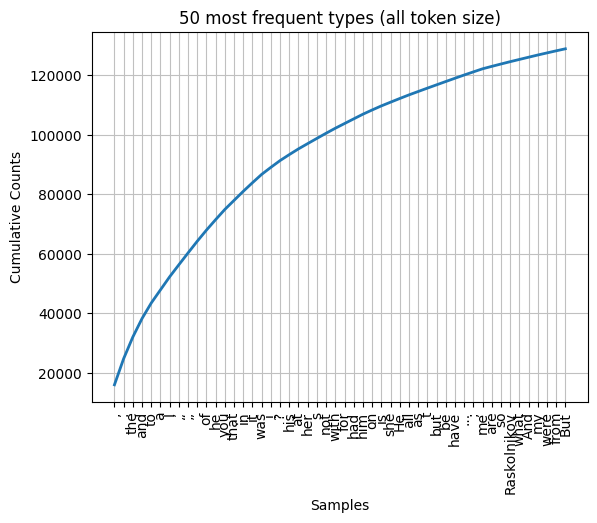

<Axes: title={'center': '50 most frequent types (all token size)'}, xlabel='Samples', ylabel='Cumulative Counts'>

In [14]:
plt.title("50 most frequent types (all token size)")
freq_distr.plot(50, cumulative=True)

Text(0.5, 1.0, '50 most frequent types (token size > 3)')

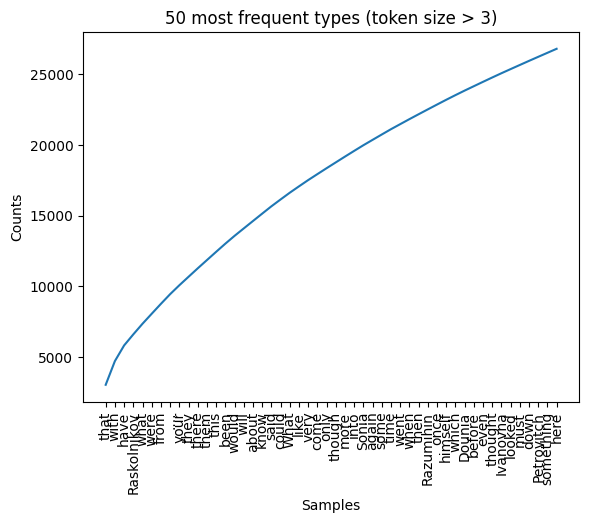

In [15]:
freq_token, counts = [], []
_count = 0
for (token, count) in most_common_50:
    freq_token.append(token)
    _count += count
    counts.append(_count)
plt.plot(freq_token, counts)
plt.xticks(rotation=90)
plt.ylabel("Counts")
plt.xlabel("Samples")
plt.title("50 most frequent types (token size > 3)")

Zipf's law was originally formulated in terms of quantitative linguistics, stating that given some corpus of natural language utterances, the frequency $f$ of any word is inversely proportional to its rank $k$ in the frequency table, i.e. $f ∝ 1/k$ (note: in the classic version of Zipf's law, the exponent s is 1). Alternatively, this can be stated and re-cast as follows 

$f \cdot k ∝ const$ 

$log(f \cdot k) ∝ const$ or 

$log(f) ∝ const - log(k)$

which represent a linear relation between frequency $f$ and rank $k$ on a log-log scale.

You can use this relation to ask questions like:

- What is the probability of encountering the most common word or the 10th most common word in a corpus with 100,000 words?

Knowledge of the Zipf distribution has been used to build better neural language models (see e.g.,  
https://medium.com/@_init_/using-zipfs-law-to-improve-neural-language-models-4c3d66e6d2f6).



<font color='green'>**Question**: Generate a list of the number of occurrences of each word type, in decreasing order, from the `FreqDist` object.  Plot for the first 100 ranks the number of occurrences on the *y&nbsp;* axis and the rank of each value (1, 2, 3, ..., 100) on the *x&nbsp;* axis, using a **log-log scale**.  Add the plot of the function $y = a/x^b$, trying to set *a&nbsp;* and *b&nbsp;* so that the two lines are as close as possible (by trial and error, not using a formal method).  The behavior is in fact predicted by [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law). </font>

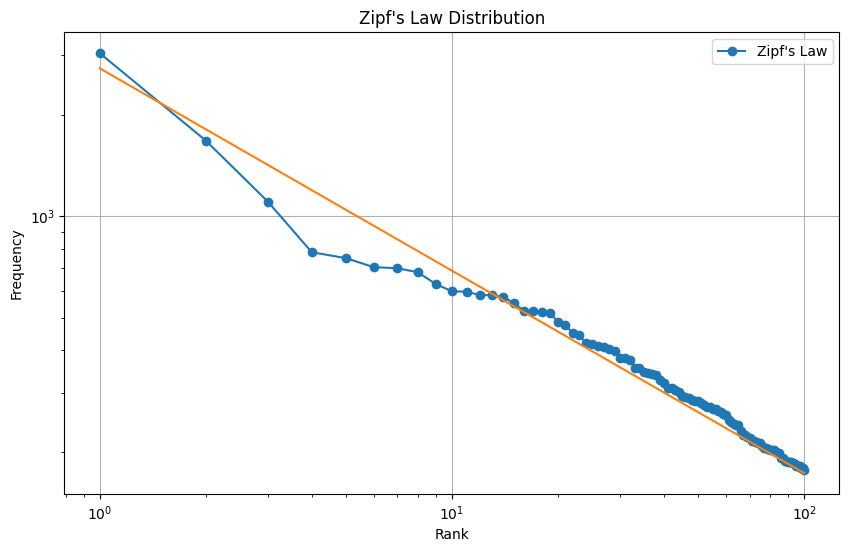

In [16]:
ranks_100 = list(range(1, 101))
most_common_100 = [count for token, count in token_freq][:100]

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ranks_100) + 1), most_common_100, marker='o', linestyle='-')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Zipf\'s Law Distribution')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Zipf\'s Law'])
plt.grid(True)

a = 14**3
b = 0.6
def approx_zipf(_rank):
    return a / (_rank ** b)

y = []
for rank in ranks_100:
    y.append(approx_zipf(rank))
    
# plt.legend(['Fitted function'])
plt.plot(ranks_100, y, label="Fitted function")


plt.show()

## Processing markup with Beautiful Soup
To extract text from an HTML or XML file, you can use the `BeautifulSoup` Python package.  Some examples are found in  [Chapter 3 of the NLTK book](http://www.nltk.org/book/ch03.html).  The simplest way is using `get_text`, but this will also get text from tables, image captions, etc. You can also check the 
[BeautifulSoup documentation](https://beautiful-soup-4.readthedocs.io/en/latest/) or tutorials [here](https://matix.io/extract-text-from-webpage-using-beautifulsoup-and-python/) or [here](https://www.pluralsight.com/guides/extracting-data-html-beautifulsoup).

In [17]:
from urllib import request  # if needed
from bs4 import BeautifulSoup

In [18]:
# Sample code : extracted text is the "raw2" string.
url2 = "https://en.wikipedia.org/wiki/Switzerland"
response2 = request.urlopen(url2)
html2 = response2.read().decode('utf8')
raw2 = BeautifulSoup(html2).get_text()

<font color='green'>**Question**: What are the number of word tokens, types and TTR of the Wikipedia page at `url2`? </font>

In [19]:
words2 = nltk.word_tokenize(raw2)
vocabulary2 = set(words2)
print("Number of tokens: ", len(words2))
print("Number of types: ", len(vocabulary2))
print("Type to token ratio: ", len(vocabulary2) / len(words2))

Number of tokens:  29869
Number of types:  6127
Type to token ratio:  0.20512906357762228


## More advanced pre-processing options
Please read and experiment with the notebook `MSE_AnTeDe_TextPreprocessingDemo.ipynb`, where you will find more advanced pre-processing options:
1. a set of NLTK functions for lemmatization and stemming;
2. the in-house class `TextPreprocessing`;
3. gensim's `preprocess_documents` function.

The underlying definitions and methods of some of them will be presented in the following lessons of AnTeDe, and you will be able to use them in future lab work.

## End of AnTeDe Lab 1
Please rerun anew all cells via "Runtime > Restart and run all", save this completed notebook, compress it to a *zip* file, and upload it to Moodle.